# CAPSTONE PROJECT

# Context
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

# Content
 Variable: Definition
1. User_ID:- User ID
2. Product_ID:- Product ID
3. Gender:- Sex of User
4. Age:- Age in bins
5. Occupation:- Occupation (Masked)
6. City_Category:- Category of the City (A,B,C)
7. Stay_In_Current_City_Years:- Number of years stay in current city
8. Marital_Status:- Marital Status
9. Product_Category_1:- Product Category (Masked)
10. Product_Category_2:- Product may belongs to other category also (Masked)
11. Product_Category_3:- Product may belongs to other category also (Masked)
12. Purchase:- Purchase Amount (Target Variable)


# Target
Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Featching Train and Test Data

In [3]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
print("Shape of test_data:",df_test.shape)
print("Shape of train_data:",df.shape)

Shape of test_data: (233599, 11)
Shape of train_data: (550068, 12)


We create a new train data("train_df") in which we remove target variable(Purchase) temporary.

In [8]:
train_df = df.iloc[:,:-1]
train_df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN


In [9]:
train_df.shape, df_test.shape


((550068, 11), (233599, 11))

Concat train_data and test_data without target variable as "df_Concat".

In [10]:
df_concat = pd.concat([train_df, df_test], ignore_index=True)
df_concat.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN


We will drop "User_ID" and "Product_ID" variable, because it is show only an unique value and not important dor DataSet.

In [11]:
df_concat=df_concat.drop(["User_ID","Product_ID"],axis=1)

In [12]:
df_concat.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000
mean,8.079300,0.409777,5.366196,9.844506,12.668605
std,6.522206,0.491793,3.878160,5.089093,4.125510
min,0.000000,0.000000,1.000000,2.000000,3.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000


# Missing values

In [13]:
df_concat.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
dtype: int64

<AxesSubplot:>

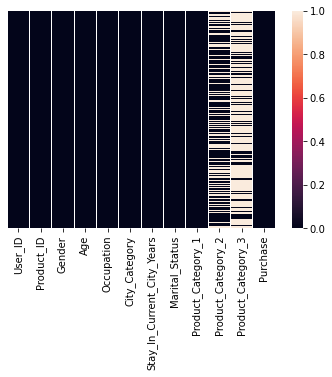

In [14]:
sns.heatmap(df.isnull(), yticklabels=False)

In [15]:
#Fill the null values in "Product_Category_2" and "Product_Category_3" with minimum number
df_concat.fillna(-999, inplace=True)

In [16]:
# No null values
df_concat.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [17]:
#Gender has two categorical values F and M. So we will have to convert Gender from Object data type to categorical

df_concat["Gender"].unique()

array(['F', 'M'], dtype=object)

In [18]:
#Occupation has 21 unique categories from 0 to 21. So it should be converted to categorical.

print(sorted(df_concat["Occupation"].unique()))
df_concat.groupby("Occupation")["Occupation"].count()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


Occupation
0      98850
1      67687
2      37996
3      25126
4     103086
5      17373
6      29102
7      84127
8       2189
9       8929
10     18304
11     16593
12     44448
13     11053
14     38782
15     17356
16     36122
17     57418
18      9367
19     11919
20     47840
Name: Occupation, dtype: int64

In [19]:
#Age is divided into 7 unique intervals. So convert it into categorical.
print(df_concat["Age"].unique())
df_concat["Age"].describe()

['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']


count     783667
unique         7
top        26-35
freq      313015
Name: Age, dtype: object

In [20]:
#Three categories of citys are there. So convert to categorical.
print(df_concat["City_Category"].unique())
df_concat["City_Category"].describe()

['A' 'C' 'B']


count     783667
unique         3
top            B
freq      329739
Name: City_Category, dtype: object

In [21]:
#Stay_In_Current_City_Years has 5 unique values. So convert to categorical.
print(df_concat['Stay_In_Current_City_Years'].unique())
print(df_concat['Stay_In_Current_City_Years'].describe())
print(df_concat.groupby('Stay_In_Current_City_Years')['Stay_In_Current_City_Years'].count())

['2' '4+' '3' '1' '0']
count     783667
unique         5
top            1
freq      276425
Name: Stay_In_Current_City_Years, dtype: object
Stay_In_Current_City_Years
0     105716
1     276425
2     145427
3     135428
4+    120671
Name: Stay_In_Current_City_Years, dtype: int64


In [22]:
#Marital Status has two values 0 and 1. So convert to categorical.
print(df_concat['Marital_Status'].unique())
print(df_concat['Marital_Status'].describe())
print(df_concat.groupby('Marital_Status')['Marital_Status'].count())

[0 1]
count    783667.000000
mean          0.409777
std           0.491793
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Marital_Status, dtype: float64
Marital_Status
0    462538
1    321129
Name: Marital_Status, dtype: int64


In [23]:
#Product_Category_1 has 20 unique values. Convert to categorical.
print(df_concat['Product_Category_1'].unique())
print(df_concat['Product_Category_1'].describe())
print(df_concat.groupby('Product_Category_1')['Product_Category_1'].count())

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
count    783667.000000
mean          5.366196
std           3.878160
min           1.000000
25%           1.000000
50%           5.000000
75%           8.000000
max          20.000000
Name: Product_Category_1, dtype: float64
Product_Category_1
1     200699
2      34056
3      28791
4      16756
5     215950
6      29326
7       5345
8     162294
9        604
10      7373
11     34440
12      5610
13      7930
14      2186
15      8984
16     13933
17       801
18      4436
19      1603
20      2550
Name: Product_Category_1, dtype: int64


In [24]:
#Product_Category_2 had 173638 values missing specified as NaN. These converted to -999 value.
print(sorted(df_concat['Product_Category_2'].unique()))
print(df_concat['Product_Category_2'].describe())
print(df_concat.groupby('Product_Category_2')['Product_Category_2'].count())
df_concat['Product_Category_2'].isnull().sum()

[-999.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
count    783667.000000
mean       -306.817532
std         468.194361
min        -999.000000
25%        -999.000000
50%           5.000000
75%          14.000000
max          18.000000
Name: Product_Category_2, dtype: float64
Product_Category_2
-999.0    245982
 2.0       70498
 3.0        4123
 4.0       36705
 5.0       37165
 6.0       23575
 7.0         854
 8.0       91317
 9.0        8177
 10.0       4420
 11.0      20230
 12.0       7801
 13.0      15054
 14.0      78834
 15.0      54114
 16.0      61687
 17.0      19104
 18.0       4027
Name: Product_Category_2, dtype: int64


0

In [25]:
#Product_Category_3 has 383247 values missing specified as NaN. These converted to -999 value.
print(sorted(df_concat['Product_Category_3'].unique()))
print(df_concat['Product_Category_3'].describe())
print(df_concat.groupby('Product_Category_3')['Product_Category_3'].count())
df_concat['Product_Category_3'].isnull().sum()

[-999.0, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
count    783667.000000
mean       -691.939130
std         465.148262
min        -999.000000
25%        -999.000000
50%        -999.000000
75%           8.000000
max          18.000000
Name: Product_Category_3, dtype: float64
Product_Category_3
-999.0    545809
 3.0         878
 4.0        2691
 5.0       23799
 6.0        6888
 8.0       17861
 9.0       16532
 10.0       2501
 11.0       2585
 12.0      13115
 13.0       7849
 14.0      26283
 15.0      39968
 16.0      46469
 17.0      23818
 18.0       6621
Name: Product_Category_3, dtype: int64


0

# Data Visualization

# What is the purchase amount of customer against various products?
"Purchase" is a Target variable

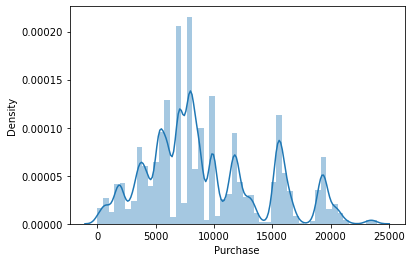

In [26]:
sns.distplot(df["Purchase"])
plt.show()

# Customers distribution with respect to Gender and Marital_status
In Female customers, most of the peoples are not maried(around 80000), similarly in the case of Gender male, again 
Marital_status is 0

<AxesSubplot:xlabel='Gender', ylabel='count'>

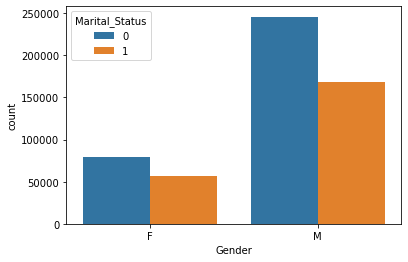

In [27]:
sns.countplot(x="Gender", hue="Marital_Status", data=df)

# What is the majority City_category of peoples in Customer distribution?  
Most of the customer purchase amount are belonging to City_Category "B"

Text(0.5, 1.0, 'Customers Distribution with City_Category')

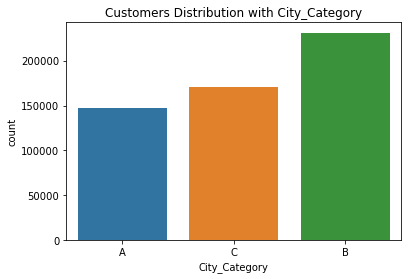

In [28]:
sns.countplot(x="City_Category",data=df)
plt.title("Customers Distribution with City_Category")

# What is the Average Age of peoples in Customer distribution? 
Around 26-35 age group of people are purchase various products. 

Text(0.5, 1.0, 'Customer Distribution with respect to Age')

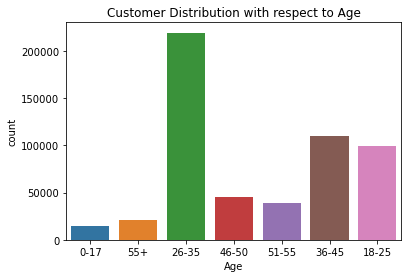

In [29]:
sns.countplot(x="Age",data=df)
plt.title("Customer Distribution with respect to Age")

# What is the number of years stay in current city of people for Customer distribution? 
Those people who have been living in the current city for 1 year, those people purchase more and more products.

Text(0.5, 1.0, 'Customer Distribution with respect to numbers of years stay in current city')

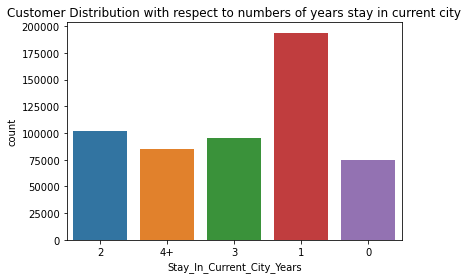

In [30]:
sns.countplot(x="Stay_In_Current_City_Years",data=df)
plt.title("Customer Distribution with respect to numbers of years stay in current city")

# What is the Customer Distribution with respect to Product Category?

Text(0.5, 1.0, 'Customer Distribution with respect to Occupation')

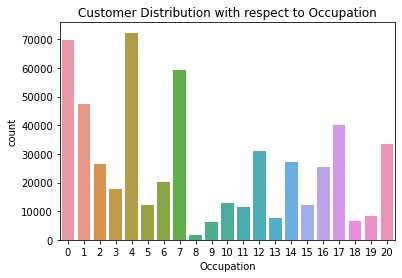

In [31]:
sns.countplot(x="Occupation",data=df)
plt.title("Customer Distribution with respect to Occupation")

# Data Encoding

Have to convert some categorical variable into numerical.

In [32]:
age_encoder = LabelEncoder()
df_concat['Age'] = age_encoder.fit_transform(df_concat['Age'])

city_category_encoder = LabelEncoder()
df_concat['City_Category'] = city_category_encoder.fit_transform(df_concat['City_Category'])

stay_encoder = LabelEncoder()
df_concat['Stay_In_Current_City_Years'] = stay_encoder.fit_transform(df_concat['Stay_In_Current_City_Years'])

gender_encoder = LabelEncoder()
df_concat['Gender'] = gender_encoder.fit_transform(df_concat['Gender'])

In [33]:
df_concat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int32  
 1   Age                         783667 non-null  int32  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int32  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
dtypes: float64(2), int32(4), int64(3)
memory usage: 41.9 MB


Dividing DAtaSet in which, train data(all independent variable) in X=axis and target variable(purchase) in Y-axis. 

In [34]:
X = df_concat.iloc[:550068,:]
y = df.iloc[:550068,-1:]


In [35]:
df_concat

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,0,2,0,3,-999.0,-999.0
1,0,0,10,0,2,0,1,6.0,14.0
2,0,0,10,0,2,0,12,-999.0,-999.0
3,0,0,10,0,2,0,12,14.0,-999.0
4,1,6,16,2,4,0,8,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...
783662,0,2,15,1,4,1,8,-999.0,-999.0
783663,0,2,15,1,4,1,5,8.0,-999.0
783664,0,2,15,1,4,1,1,5.0,12.0
783665,0,4,1,2,4,0,10,16.0,-999.0


In [36]:
X.shape, y.shape


((550068, 9), (550068, 1))

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((385047, 9), (165021, 9), (385047, 1), (165021, 1))

# Data Modeling

In [39]:
X_train

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
500304,1,2,16,0,0,0,8,14.0,-999.0
16861,1,2,1,1,2,1,16,-999.0,-999.0
113230,1,1,7,0,1,0,8,16.0,-999.0
434978,1,2,0,0,1,0,1,16.0,-999.0
385516,0,3,3,2,3,1,3,4.0,5.0
...,...,...,...,...,...,...,...,...,...
110268,1,4,17,2,2,0,5,-999.0,-999.0
259178,1,2,14,2,2,1,5,-999.0,-999.0
365838,0,1,1,1,1,0,5,-999.0,-999.0
131932,0,1,4,1,2,0,8,14.0,-999.0


# Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor


In [41]:
tree_reg = DecisionTreeRegressor(min_samples_split=8, min_samples_leaf = 80)


In [42]:
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor(min_samples_leaf=80, min_samples_split=8)

In [43]:
y_train_pred = tree_reg.predict(X_train)


In [44]:
y_test_pred = tree_reg.predict(X_test)


In [45]:
np.sqrt(mean_squared_error(y_train, y_train_pred))


2874.560749210658

In [46]:
np.sqrt(mean_squared_error(y_test, y_test_pred))


2947.342378722925

With decision tree regressor we got 2874.56 mean_square_error in trainnig and 2947.34 in testing.

# Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression


In [48]:
simple_linear = LinearRegression()
simple_linear.fit(X_train, y_train)


LinearRegression()

In [49]:
train_predicts = simple_linear.predict(X_train)
test_predicts = simple_linear.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_predicts)))
print(np.sqrt(mean_squared_error(y_test, test_predicts)))


4609.800863568961
4612.313290951187


With Linear Regressor we got 4609.80 mean_square_error in trainnig and 4612.31 in testing.
Now lets try Random Forest.



# Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor


In [51]:
forest_regressor = RandomForestRegressor(min_samples_split=8, min_samples_leaf = 80, n_estimators=30)


In [52]:
forest_regressor.fit(X_train, y_train)


RandomForestRegressor(min_samples_leaf=80, min_samples_split=8, n_estimators=30)

In [53]:
train_predicts = forest_regressor.predict(X_train)
test_predicts = forest_regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_predicts)))
print(np.sqrt(mean_squared_error(y_test, test_predicts)))

2873.7898713713566
2930.2853703939504


In [64]:
#Accuracy
forest_regressor.score(y_test, test_predicts)


ValueError: X has 1 features, but DecisionTreeRegressor is expecting 9 features as input.

In random_forest, Mean_Square_Error of train and test is much better than decision and linear.

# Testing on Test data


In [54]:
test_data = df_concat.loc[550068:,:]
test_data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
550068,1,4,7,1,2,1,1,11.0,-999.0
550069,1,2,17,2,0,0,3,5.0,-999.0
550070,0,3,1,1,4,1,5,14.0,-999.0
550071,0,3,1,1,4,1,4,9.0,-999.0
550072,0,2,1,2,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...
783662,0,2,15,1,4,1,8,-999.0,-999.0
783663,0,2,15,1,4,1,5,8.0,-999.0
783664,0,2,15,1,4,1,1,5.0,12.0
783665,0,4,1,2,4,0,10,16.0,-999.0


In [55]:
predictions = forest_regressor.predict(test_data)


In [56]:
preds_df = pd.DataFrame(predictions, columns=['Purchase'])
preds_df.tail()


,Purchase
233594,7002.946462
233595,6519.068477
233596,13116.427090
233597,20324.595930
233598,2341.968215


In [57]:
output = pd.concat([df_test,preds_df], axis=1)
output.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,13736.046961
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,10572.970480
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,6368.270607
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2537.331182
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,2812.920781


In [58]:
output.to_csv('Submission1.csv', index=False)



As can be seen above Random Forest is performing a little bit better as compared to Decision Tree alone.

The score for test case for this random forest is 2930.489258054646.

# Gradient Boosting Regressor

In [59]:
from sklearn.ensemble import GradientBoostingRegressor


In [60]:
gradient_booster = GradientBoostingRegressor(n_estimators=1200, min_samples_leaf=80, min_samples_split=8)


In [61]:
gradient_booster


GradientBoostingRegressor(min_samples_leaf=80, min_samples_split=8,
                          n_estimators=1200)

In [62]:
gradient_booster.fit(X_train, y_train)


GradientBoostingRegressor(min_samples_leaf=80, min_samples_split=8,
                          n_estimators=1200)

In [63]:

train_predicts = gradient_booster.predict(X_train)
test_predicts = gradient_booster.predict(X_test)
print(np.sqrt(mean_squared_error(y_train, train_predicts)))
print(np.sqrt(mean_squared_error(y_test, test_predicts)))


2902.233305116449
2927.618436381513
